In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

pd.set_option('display.max_columns',500)
plt.style.use('seaborn')

In [3]:
df=pd.read_csv('melb_data.csv')
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


# NOMOR 1

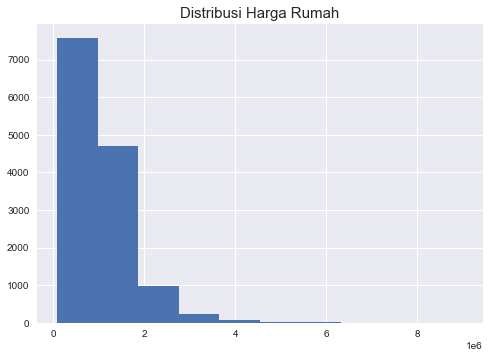

In [16]:
plt.hist(df['Price'])
plt.title('Distribusi Harga Rumah', size=15)
plt.show()

C:\Users\ZenBook-Tiowiradin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


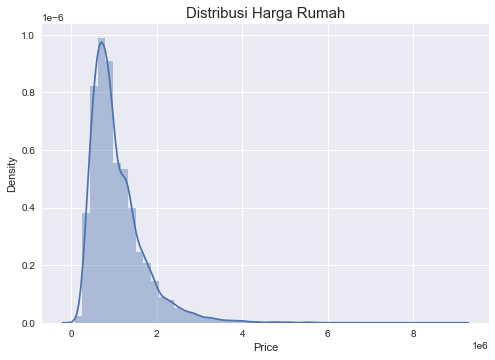

In [17]:
sns.distplot(df['Price'],kde=True)
plt.title('Distribusi Harga Rumah', size=15)
plt.show()

# NOMOR 2

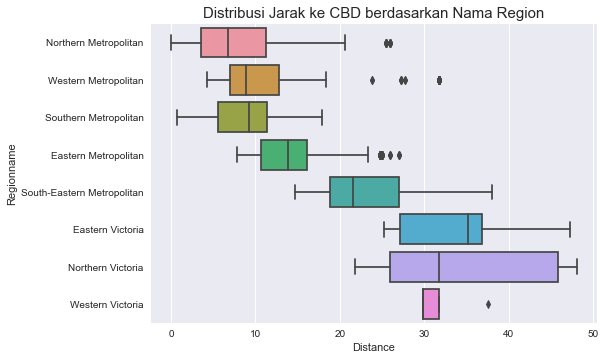

In [18]:
sns.boxplot(x='Distance', y='Regionname', data=df)
plt.title('Distribusi Jarak ke CBD berdasarkan Nama Region', size=15)
plt.show()

# NOMOR 3

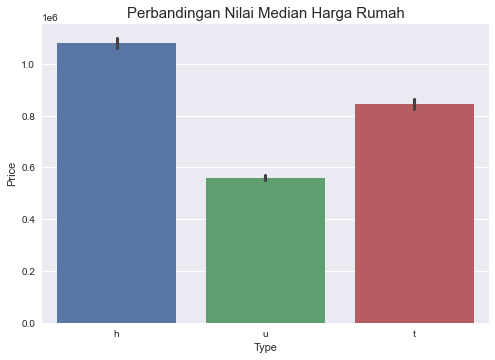

In [19]:
sns.barplot(data=df, x='Type', y='Price', estimator=np.median)
plt.title('Perbandingan Nilai Median Harga Rumah',size=15)
plt.show()

# NOMOR 4

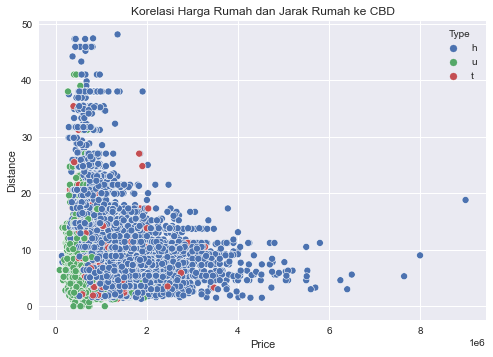

In [21]:
sns.scatterplot(data=df, x='Price', y='Distance', hue='Type')
plt.title('Korelasi Harga Rumah dan Jarak Rumah ke CBD')
plt.xlabel('Price')
plt.ylabel('Distance')
plt.show()

# NOMOR 5

In [23]:
df['Date']=df['Date'].astype('datetime64')
df['Date']

0       2016-03-12
1       2016-04-02
2       2017-04-03
3       2017-04-03
4       2016-04-06
           ...    
13575   2017-08-26
13576   2017-08-26
13577   2017-08-26
13578   2017-08-26
13579   2017-08-26
Name: Date, Length: 13580, dtype: datetime64[ns]

In [34]:
df['Month']=df['Date'].dt.month

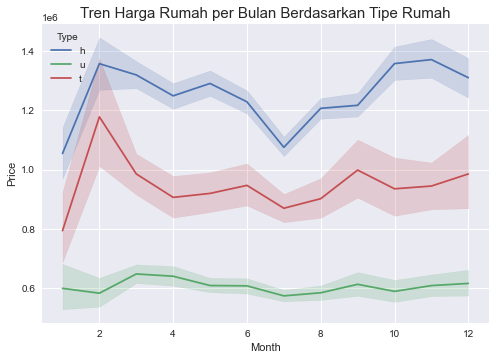

In [43]:
sns.lineplot(data=df, x='Month', y='Price', hue='Type')
plt.title('Tren Harga Rumah per Bulan Berdasarkan Tipe Rumah', size=15)
plt.show()

# NOMOR 6

In [50]:
df_tlt=pd.DataFrame(df.groupby('Regionname')['Landsize'].sum()).reset_index()
df_tlt

,Regionname,Landsize
0,Eastern Metropolitan,932811.0
1,Eastern Victoria,156334.0
2,Northern Metropolitan,2213208.0
3,Northern Victoria,137574.0
4,South-Eastern Metropolitan,276296.0
5,Southern Metropolitan,2390939.0
6,Western Metropolitan,1455153.0
7,Western Victoria,20976.0


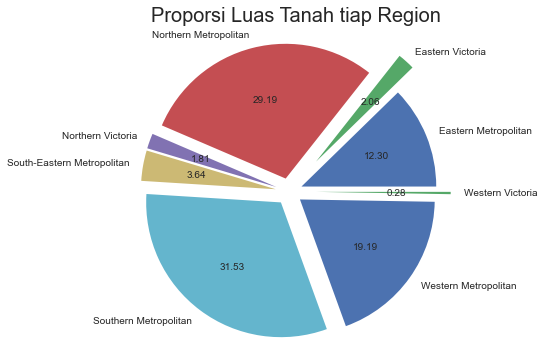

In [72]:
plt.figure(figsize=(8,6))
plt.pie(
    df_tlt.Landsize,
    labels=df_tlt['Regionname'],
    autopct='%.2f',
    explode=(0.1,0.3,0.1,0.1,0.1,0.1,0.1,0.2)
)
plt.axis('equal')
plt.title('Proporsi Luas Tanah tiap Region',size=20)
plt.show()

# NOMOR 7

In [73]:
from scipy.stats import normaltest

In [74]:
stats, pval = normaltest(df['Price'])

print(pval)

if pval <= 0.05:
    print('Distribusi tidak normal')
else:
    print('Distribusi normal')

0.0
Distribusi tidak normal


In [75]:
stats, pval = normaltest(df['Distance'])

print(pval)

if pval <= 0.05:
    print('Distribusi tidak normal')
else:
    print('Distribusi normal')

0.0
Distribusi tidak normal


In [82]:
stats, pval = normaltest(df['Landsize'])

print(pval)

if pval <= 0.05:
    print('Distribusi tidak normal')
else:
    print('Distribusi normal')

0.0
Distribusi tidak normal


In [83]:
stats, pval = normaltest(df['Rooms'])

print(pval)

if pval <= 0.05:
    print('Distribusi tidak normal')
else:
    print('Distribusi normal')

3.940470563403166e-107
Distribusi tidak normal


In [84]:
corr_matrix=df[['Price','Distance','Landsize','Rooms']].corr(method='spearman')
corr_matrix

,Price,Distance,Landsize,Rooms
Price,1.000000,-0.129990,0.327200,0.539886
Distance,-0.129990,1.000000,0.417379,0.351416
Landsize,0.327200,0.417379,1.000000,0.485742
Rooms,0.539886,0.351416,0.485742,1.000000


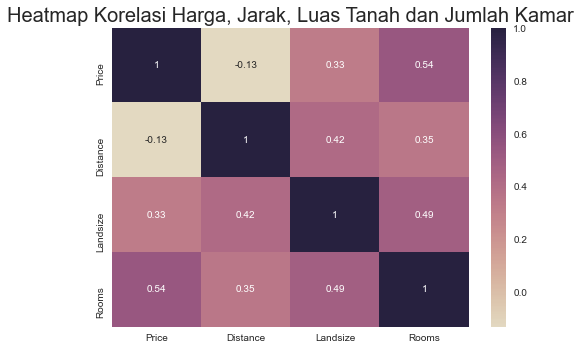

In [86]:
sns.heatmap(corr_matrix, annot=True, cmap=sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))
plt.title('Heatmap Korelasi Harga, Jarak, Luas Tanah dan Jumlah Kamar',size=20)
plt.show()

# NOMOR 8

In [119]:
df_hrt=pd.DataFrame(df.sort_values(by='Price',ascending=False).head(10)).reset_index()
df_hrt

,index,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Month
0,12094,Mulgrave,35 Bevis St,3,h,9000000.0,PI,Hall,2017-07-29,18.8,3170.0,3.0,1.0,1.0,744.0,117.0,1960.0,Monash,-37.93168,145.16126,South-Eastern Metropolitan,7113.0,7
1,7692,Canterbury,49 Mangarra Rd,5,h,8000000.0,VB,Sotheby's,2017-05-13,9.0,3126.0,5.0,5.0,4.0,2079.0,464.3,1880.0,Boroondara,-37.81790,145.06940,Southern Metropolitan,3265.0,5
2,9575,Hawthorn,49 Lisson Gr,4,h,7650000.0,S,Abercromby's,2017-06-17,5.3,3122.0,4.0,2.0,4.0,1690.0,284.0,1863.0,Boroondara,-37.82652,145.03052,Southern Metropolitan,11308.0,6
3,3616,Kew,15 Barry St,6,h,6500000.0,S,Jellis,2016-08-13,5.6,3101.0,6.0,6.0,3.0,1334.0,365.0,1890.0,Boroondara,-37.80290,145.02670,Southern Metropolitan,10331.0,8
4,12557,Middle Park,136 Page St,5,h,6400000.0,S,Marshall,2017-09-09,3.0,3206.0,5.0,2.0,1.0,553.0,308.0,1920.0,NaN,-37.84908,144.95753,Southern Metropolitan,2019.0,9
5,6372,Toorak,17 Albany Rd,3,h,6250000.0,S,Kay,2016-10-15,4.6,3142.0,3.0,3.0,2.0,564.0,342.0,2000.0,Stonnington,-37.84860,145.02440,Southern Metropolitan,7217.0,10
6,7554,Brighton,161 Church St,5,h,5800000.0,PI,Castran,2017-08-04,11.2,3186.0,5.0,4.0,4.0,1276.0,NaN,1880.0,Bayside,-37.91640,144.99740,Southern Metropolitan,10579.0,8
7,5631,South Yarra,18 Avoca St,4,h,5700000.0,S,Castran,2016-12-11,3.3,3141.0,4.0,2.0,0.0,292.0,272.0,1880.0,Stonnington,-37.83770,144.98940,Southern Metropolitan,14887.0,12
8,9233,Middle Park,204 Page St,6,h,5600000.0,PI,Marshall,2017-03-06,3.0,3206.0,6.0,4.0,2.0,472.0,328.0,1915.0,Port Phillip,-37.85231,144.96373,Southern Metropolitan,2019.0,3
9,251,Armadale,367 Dandenong Rd,6,h,5525000.0,S,Marshall,2016-09-17,6.3,3143.0,5.0,3.0,4.0,1491.0,516.0,1935.0,Stonnington,-37.86020,145.01300,Southern Metropolitan,4836.0,9


In [135]:
melb_map=folium.Map(location=[-37.8136, 144.9631],zoom_start=11)

for i in range (len(df_hrt)):
    harga=df_hrt.iloc[i]['Price']
    folium.Marker([df_hrt.iloc[i]['Lattitude'], df_hrt.iloc[i]['Longtitude']],
                  popup=(f'Price:\nAUD\n{harga/1000000} M'),
                  tooltip=df_hrt.iloc[i]['Address'],
                  icon=folium.Icon(color='red',icon='info-sign')
                 ).add_to(melb_map)
              

melb_map
